In [3]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import warnings
%pylab inline
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [67]:
df = pd.read_csv('../data/full_final_UFO.csv')

In [68]:
df.columns.values

array(['Unnamed: 0', 'datetime', 'city', 'state', 'country', 'shape',
       'duration (seconds)', 'duration (hours/min)', 'comments',
       'date posted', 'latitude', 'longitude ', 'date_pd', 'time_pd',
       'days_lapsed_after_sighting', 'dow_sighting', 'Month_sighting',
       'hour_sighting', 'label', 'phase', 'phaseid', 'index', 'STATE',
       'EVENT_TYPE', 'Proximity to USAFB'], dtype=object)

In [6]:
new_df = df[['date_pd','city','state','shape','duration (seconds)','label','phase','EVENT_TYPE']]
new_df['datetime'] = pd.to_datetime(new_df['datetime'])

In [7]:
new_df[:5]

,datetime,city,state,shape,duration (seconds),label,phase,EVENT_TYPE
0,1970-10-10,bellmore,ny,disk,1800.0,0,First Quarter,NaN
1,1970-10-10,manchester,ky,unknown,180.0,0,First Quarter,NaN
2,1971-10-10,lexington,nc,oval,30.0,0,Full Moon,NaN
3,1972-10-10,harlan county,ky,circle,1200.0,0,New Moon,NaN
4,1972-10-10,west bloomfield,mi,disk,120.0,0,New Moon,NaN


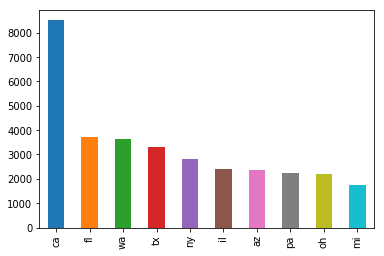

In [9]:
new_df['state'].value_counts()[:10].plot(kind='bar')

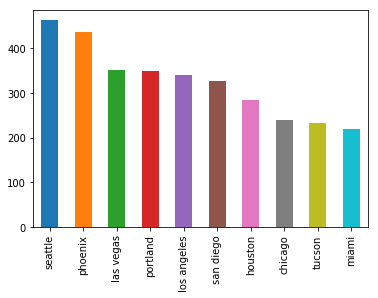

In [10]:
new_df['city'].value_counts()[:10].plot(kind='bar')

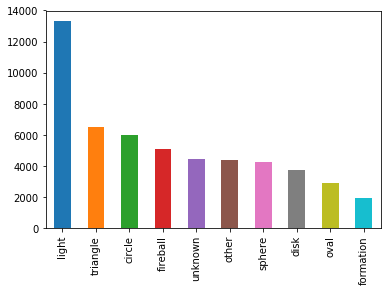

In [11]:
new_df['shape'].value_counts()[:10].plot(kind='bar')

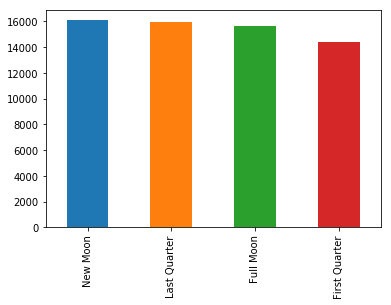

In [12]:
new_df['phase'].value_counts().plot(kind='bar')

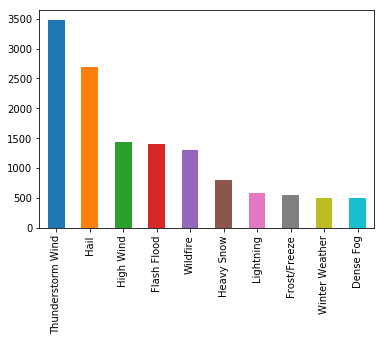

In [13]:
new_df['EVENT_TYPE'].value_counts()[:10].plot(kind='bar')

In [14]:
Y, X = dmatrices('label ~ 0 + city + state + shape + Q("duration (seconds)") + phase + EVENT_TYPE', new_df, return_type='dataframe')
y = Y['label'].values

In [15]:
features = ['city','state','shape','duration (seconds)','phase','EVENT_TYPE']

In [66]:
len(X)

16820

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify = y,random_state=99)

In [57]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier()
result = model.fit(X_train, y_train)

In [58]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.9921521997621878


In [59]:
pd.crosstab(y_train,prediction_train,rownames=['Actual'],colnames=['Prediction'])

Prediction,0.0,1.0
Actual,,
0.0,8147,1
1.0,65,197


In [60]:
prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.9686087990487515


In [61]:
pd.crosstab(y_test,prediction,rownames=['Actual'],colnames=['Prediction'])

Prediction,0.0,1.0
Actual,,
0.0,8144,3
1.0,261,2


In [35]:
list(zip(features, model.feature_importances_))

[('city', 0.0),
 ('state', 0.0),
 ('shape', 2.260703140451089e-05),
 ('duration (seconds)', 0.0),
 ('phase', 0.0),
 ('EVENT_TYPE', 3.0622629065683863e-07)]

In [62]:
len(X_train)

8410

In [63]:
len(new_df)

62080

8410